Computing mean, median and standard deviation for each screentime on weekdays
C_wk: Mean=2.10, Median=2.00, Standard Deviation=1.68
G_wk: Mean=2.11, Median=2.00, Standard Deviation=1.63
S_wk: Mean=3.19, Median=3.00, Standard Deviation=2.24
T_wk: Mean=2.65, Median=2.00, Standard Deviation=1.64

Computing mean, median and standard deviation for each screentime on weekends
C_we: Mean=2.64, Median=2.00, Standard Deviation=1.99
G_we: Mean=2.91, Median=2.00, Standard Deviation=2.10
S_we: Mean=3.84, Median=4.00, Standard Deviation=2.35
T_we: Mean=3.73, Median=4.00, Standard Deviation=1.89

Computing mean, median and standard deviation for well being indicators
Optm: Mean=3.28, Median=3.00, Standard Deviation=1.00
Usef: Mean=3.11, Median=3.00, Standard Deviation=0.95
Relx: Mean=3.10, Median=3.00, Standard Deviation=1.01
Intp: Mean=3.27, Median=3.00, Standard Deviation=1.02
Engs: Mean=3.05, Median=3.00, Standard Deviation=1.08
Dealpr: Mean=3.37, Median=3.00, Standard Deviation=1.05
Thcklr: Mean

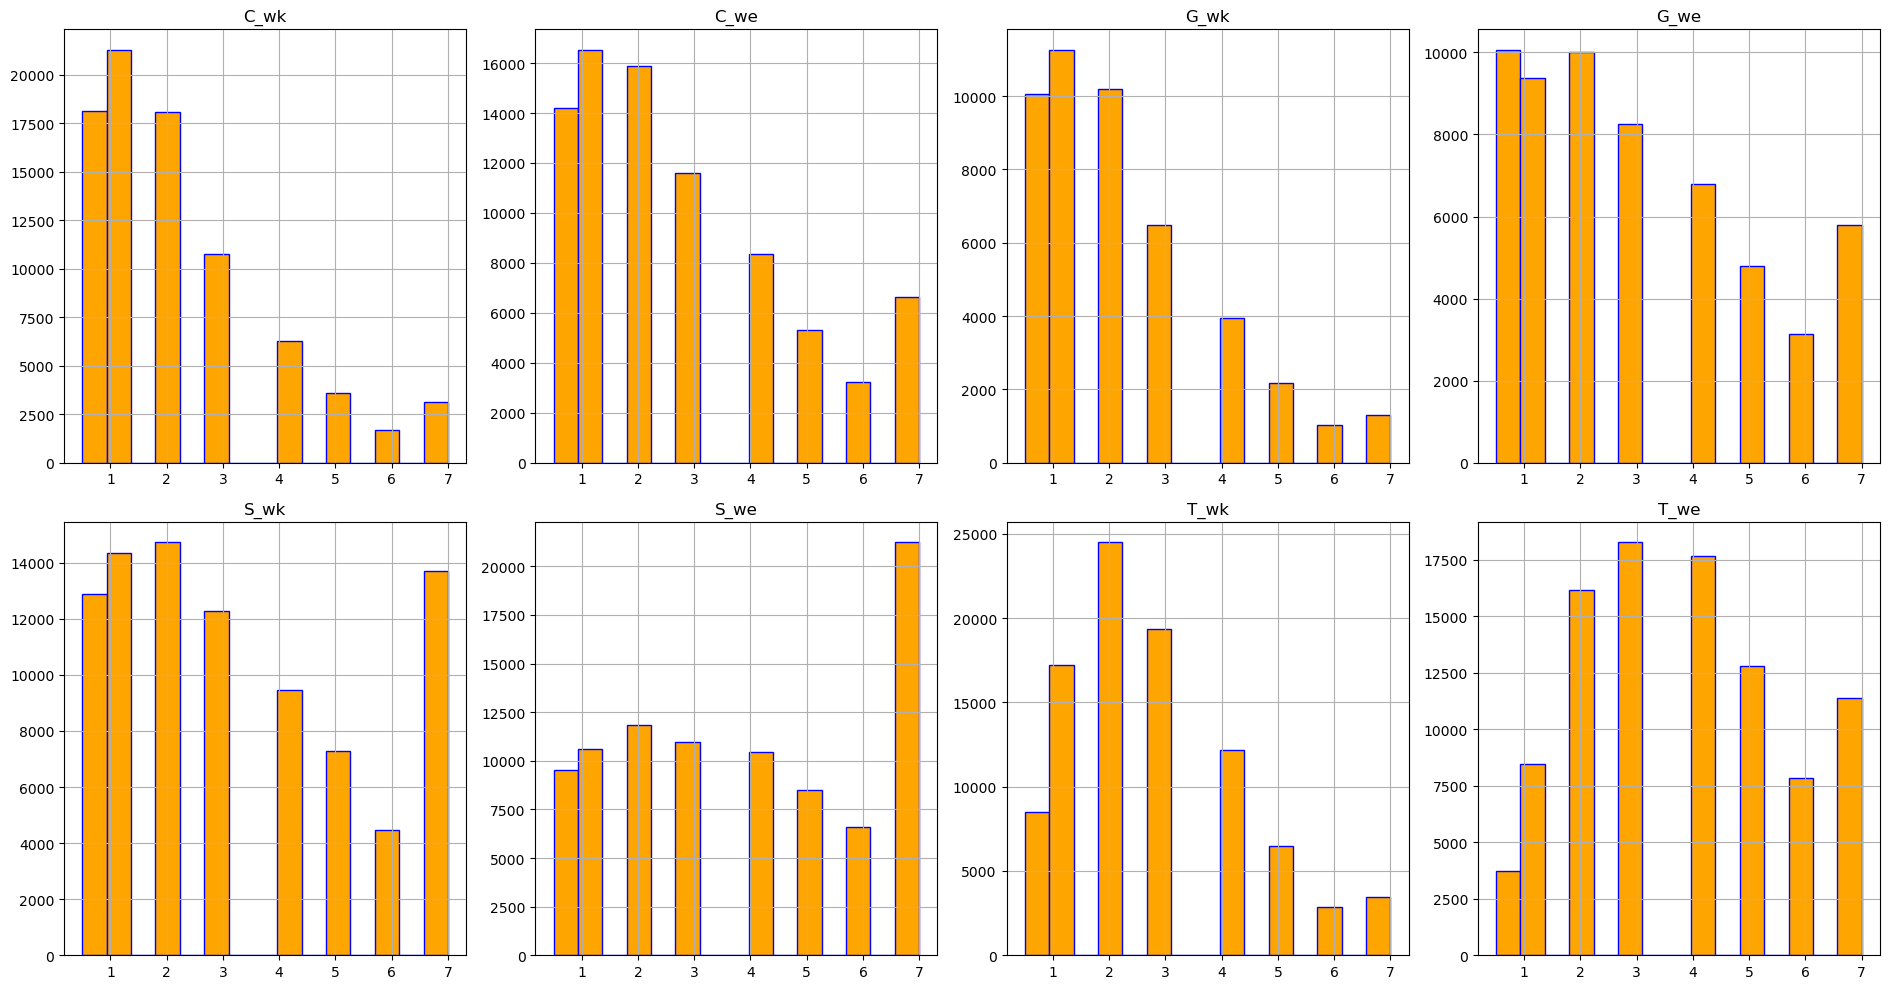

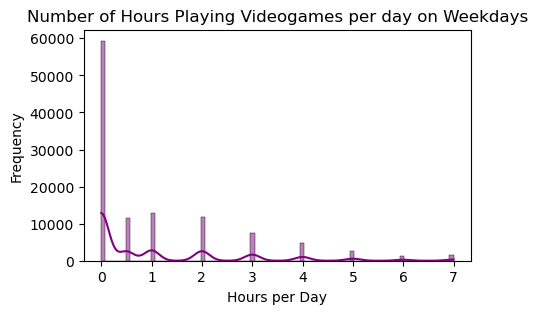

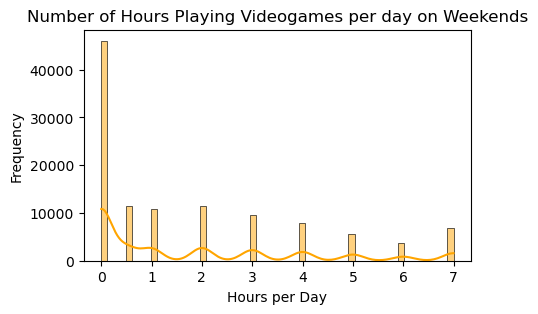

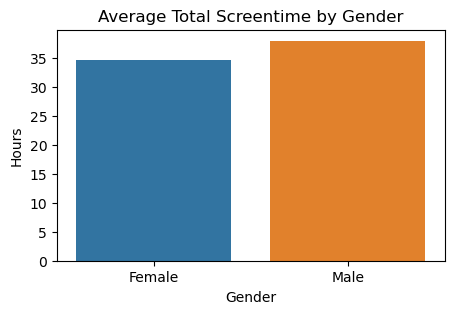

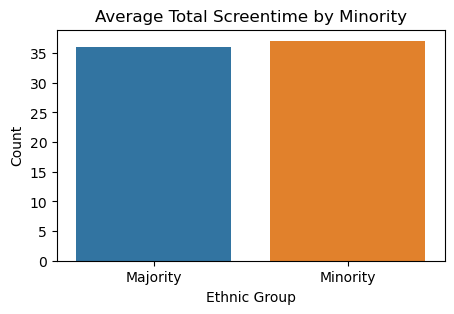

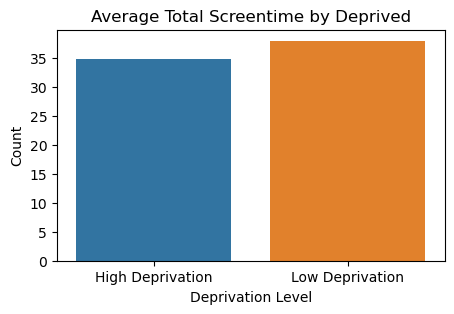

Comparison of 'Loved' Scores by Gender

T-statistics: 23.946805813597667, 
P_value: 2.3020592008014453e-126
Conclusion: The null hypothesis is rejected.

Comparison of 'Conf' Scores by Deprived

T-statistics: -1.268022635219248, 
P_value: 0.20479287134708063
Conclusion: The null hypothesis is accepted.


In [21]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read datasets into a dataframe
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv') #screentime
dataset3 = pd.read_csv('dataset3.csv') #wellbeing

#merge the datasets on the ID column
merged_data = pd.merge(dataset1,dataset2, on='ID')
merged_data = pd.merge(merged_data, dataset3, on='ID')


#MEAN, MEDIAN, STANDARD DEVIATION D2
#measures for screen time mean, median, mode
screentime_col_wk = ['C_wk', 'G_wk', 'S_wk', 'T_wk']
screentime_col_we = ['C_we', 'G_we', 'S_we', 'T_we']
screentime_col = ['C_wk', 'C_we', 'G_wk', 'G_we', 'S_wk', 'S_we', 'T_wk', 'T_we']

#calculating descriptive statistics
#calculate mean, median and standard deviation for each screentime on weekdays
print(f"Computing mean, median and standard deviation for each screentime on weekdays")
for col in screentime_col_wk:
    weekdays = merged_data[col][merged_data[col] > 0]
    print(f"{col}: Mean={weekdays.mean():.2f}, Median={weekdays.median():.2f}, Standard Deviation={weekdays.std():.2f}")

#calculate mean, median and standard deviation for each screentime on weekends
print(f"\nComputing mean, median and standard deviation for each screentime on weekends")
for col in screentime_col_we:
    weekends = merged_data[col][merged_data[col] > 0]
    print(f"{col}: Mean={weekends.mean():.2f}, Median={weekends.median():.2f}, Standard Deviation={weekends.std():.2f}")

#calculating descriptive statistics
#MEAN, MEDIAN, STANDARD DEVIATION D3
#measures for well being indicators
wellbeing_col = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf',
                'Mkmind', 'Loved', 'Intthg', 'Cheer']

#calculate mean, median and standard deviation for well being indicators
print(f"\nComputing mean, median and standard deviation for well being indicators")
for col in wellbeing_col:
   wellbeing = merged_data[col][merged_data[col] > 0]
   print(f"{col}: Mean={wellbeing.mean():.2f}, Median={wellbeing.median():.2f}, Standard Deviation={wellbeing.std():.2f}")


#HISTOGRAM    
#create histograms for screen time usage
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(19,10))
print(f"\n\nHistogram for screentime usage")
for i, col in enumerate(screentime_col):
   ax = axes.flatten()[i]
   merged_data[col][merged_data[col] > 0].hist(ax=ax, bins=15, color='orange', edgecolor='blue')
   ax.set_title(col)
plt.tight_layout()
plt.show()

# Columns
required_col = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk',
              'Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'gender', 'minority', 'deprived']

for col in required_col:
   if col not in merged_data.columns:
       raise KeyError(f"Column '{col}' is missing.")

#histogram of number of hours playing videogames per day on weekdays
plt.figure(figsize=(5,3))
sns.histplot(dataset2['G_wk'], kde=True, color='purple')
plt.title('Number of Hours Playing Videogames per day on Weekdays')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

#weekends
plt.figure(figsize=(5,3))
sns.histplot(dataset2['G_we'], kde=True, color='orange')
plt.title('Number of Hours Playing Videogames per day on Weekends')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

# AVERAGE TOTAL SCREEN TIME BY GENDER, MINORITY AND DEPRIVED
# gender
merged_data['Total_Screentime'] = merged_data[required_col].sum(axis=1)
gender_screentime = merged_data.groupby('gender')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='gender', y='Total_Screentime', data=gender_screentime)
plt.title('Average Total Screentime by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.show()

# minority
minority_screentime = merged_data.groupby('minority')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='minority', y='Total_Screentime', data=minority_screentime)
plt.title('Average Total Screentime by Minority')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Majority', 'Minority'])
plt.show()

# deprived
deprived_screentime = merged_data.groupby('deprived')['Total_Screentime'].mean().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(x='deprived', y='Total_Screentime', data=deprived_screentime)
plt.title('Average Total Screentime by Deprived')
plt.xlabel('Deprivation Level')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['High Deprivation', 'Low Deprivation'])
plt.show()

#t_stats and p_value
print(f"Comparison of 'Loved' Scores by Gender")
g1 = merged_data[merged_data['gender'] == 1]['Loved']
g2 = merged_data[merged_data['gender'] == 0]['Loved']

t_stats, p_value = stats.ttest_ind(g1,g2)
print(f"\nT-statistics: {t_stats}, \nP_value: {p_value}")

if p_value < 0.05:
    print("Conclusion: The null hypothesis is rejected.")
else:
    print("Conclusion: The null hypothesis is accepted.")
    
#t_stats and p_value
print(f"\nComparison of 'Conf' Scores by Deprived")
g3 = merged_data[merged_data['deprived'] == 1]['Conf']
g4 = merged_data[merged_data['deprived'] == 0]['Conf']

t_stats, p_value = stats.ttest_ind(g3,g4)
print(f"\nT-statistics: {t_stats}, \nP_value: {p_value}")

if p_value < 0.05:
    print("Conclusion: The null hypothesis is rejected.")
else:
    print("Conclusion: The null hypothesis is accepted.")